# This jupyter notebook test the VERT_FSFB3.py function with a sample $N^2$ profile in the California coastal region

In [1]:
import numpy as np
import scipy
import gsw
import xarray as xr
import cmocean as cmo
from numpy import linalg as LA

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# First we calculate the Brunt-Vaisla frequency squared with a sample dataset.

In [3]:
import numpy as np
import scipy
import gsw
import xarray as xr
import cmocean as cmo
from numpy import linalg as LA
from scipy import linalg

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [5]:
state_ds = xr.open_dataset('./SWOT_state_2015-01-06.nc')
state_ds

<xarray.Dataset>
Dimensions:  (Z: 90, YC: 300, XC: 300)
Coordinates:
  * Z        (Z) float32 -0.5 -1.57 -2.79 ... -5.882e+03 -6.301e+03 -6.76e+03
  * XC       (XC) float32 230.0 230.0 230.1 230.1 ... 236.2 236.2 236.2 236.2
  * YC       (YC) float32 31.01 31.03 31.05 31.07 ... 37.17 37.19 37.21 37.23
Data variables:
    THETA    (Z, YC, XC) float32 ...
    SALT     (Z, YC, XC) float32 ...
    PHIHYD   (Z, YC, XC) float32 ...
    Depth    (YC, XC) float32 ...
Attributes:
    description:  Data sample of the vertical profiles of Temperature, Salini...

In [6]:
LAT, LON = state_ds.YC.data, state_ds.XC.data

In [7]:
lat, lon = np.meshgrid(LAT, LON)

# Read Temperature, Salinity and Pressure data

In [8]:
temp = state_ds.THETA
salinity = state_ds.SALT
pres  = state_ds.PHIHYD

In [9]:
Z = state_ds.Z
#gsw.stability.Nsquared?

In [ ]:
ls

# Calculate Brunt-Vaisla frequency squared

In [10]:
SA, CT, = np.ma.masked_all(salinity.shape), np.ma.masked_all(temp.shape)
Nsquared = np.ma.masked_all([salinity.shape[0]-1,salinity.shape[1], salinity.shape[2]])
Pressure_mid = np.ma.masked_all([salinity.shape[0]-1,salinity.shape[1], salinity.shape[2]])
Z_mid = np.ma.masked_all([salinity.shape[0]-1, salinity.shape[1], salinity.shape[2]])
for y in range(SA.shape[1]):
    for x in range(SA.shape[2]):
        SA[:, y, x] = gsw.conversions.SA_from_SP(salinity.data[:, y, x], pres.data[:, y, x], LON[x], LAT[y])
        CT[:, y, x] = gsw.CT_from_pt(SA.data[:, y, x], temp.data[:, y, x])  
        Nsquared[:, y, x], Pressure_mid[:, y, x] = gsw.stability.Nsquared(SA[:, y, x], CT[:, y, x], pres[:, y, x])
        Z_mid[:, y, x] = gsw.z_from_p(Pressure_mid[:, y, x] , lat = LAT[y])

/Users/yugao/opt/anaconda3/envs/pyenv/lib/python3.8/site-packages/gsw/stability.py:85: RuntimeWarning: divide by zero encountered in true_divide
  N2 = ((g_local**2) / (specvol_mid * db_to_pa * dp))


In [11]:
Nsquared.shape

(89, 300, 300)

In [12]:
xlon, ylat = np.meshgrid(LON, LAT)

In [13]:
zz, yy = np.meshgrid(Z[1:], LAT)

# Choose a vector at a random location

In [16]:
laty, lonx = 100, 120

Text(0.5, 1.0, 'Depth = 4272.0005')

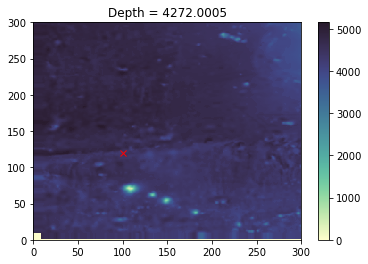

In [17]:
plt.pcolormesh(state_ds.Depth, cmap = cmo.cm.deep)
plt.plot(laty, lonx, 'x', color = 'red')
plt.colorbar()
plt.title('Depth = '+ str(state_ds.Depth[laty, lonx].data))

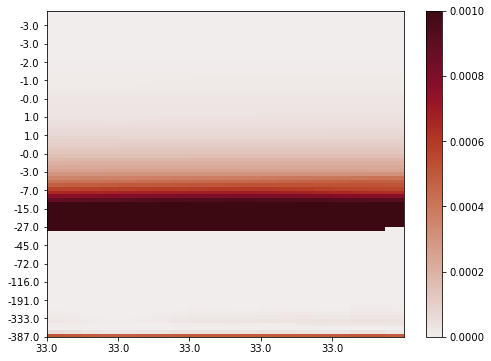

In [18]:
plt.figure(figsize = (8, 6))
latitude_y = LAT[laty:laty+20]
plt.pcolor(Nsquared[:, laty:laty+20, lonx],cmap = cmo.cm.amp, vmin = 0, vmax = 1e-3)
plt.yticks(range(0, 89, 5), np.around(np.flip(Z_mid[0::5, laty, lonx])))
plt.xticks(range(0,20,4), np.around(latitude_y[0::4]))
plt.colorbar()

In [19]:
N2_vector = Nsquared[:, laty, lonx]
Pmid_vector = Pressure_mid[:, laty, lonx]
#Pmid_vector, N2_vector

# Show where the location is on the map

Text(0.5, 1.0, 'Depth = 3639.5674')

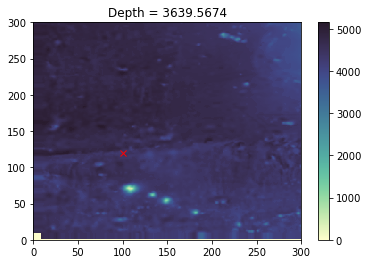

In [20]:
plt.pcolormesh(state_ds.Depth, cmap = cmo.cm.deep)
plt.plot(laty, lonx, 'x', color = 'red')
plt.colorbar()
plt.title('Depth = '+ str(state_ds.Depth[y, x].data))

## Interpolate the N2 vector onto a uniform pressure grid

In [21]:
Pmid_uniform = np.arange(Pmid_vector[0], Pmid_vector[-1], step = 6)
N2_uniform = np.interp(Pmid_uniform, Pmid_vector, N2_vector)

In [22]:
Pmid_uniform = Pmid_uniform[:]
N2_uniform = N2_uniform[:]
Pmid_uniform, N2_uniform

(array([  2.94133043,   8.94133043,  14.94133043,  20.94133043,
         26.94133043,  32.94133043,  38.94133043,  44.94133043,
         50.94133043,  56.94133043,  62.94133043,  68.94133043,
         74.94133043,  80.94133043,  86.94133043,  92.94133043,
         98.94133043, 104.94133043, 110.94133043, 116.94133043,
        122.94133043, 128.94133043, 134.94133043, 140.94133043,
        146.94133043, 152.94133043, 158.94133043, 164.94133043,
        170.94133043, 176.94133043, 182.94133043, 188.94133043,
        194.94133043, 200.94133043, 206.94133043, 212.94133043,
        218.94133043, 224.94133043, 230.94133043, 236.94133043,
        242.94133043, 248.94133043, 254.94133043, 260.94133043,
        266.94133043, 272.94133043, 278.94133043, 284.94133043,
        290.94133043, 296.94133043, 302.94133043, 308.94133043,
        314.94133043, 320.94133043, 326.94133043, 332.94133043,
        338.94133043, 344.94133043, 350.94133043, 356.94133043,
        362.94133043, 368.94133043, 374.

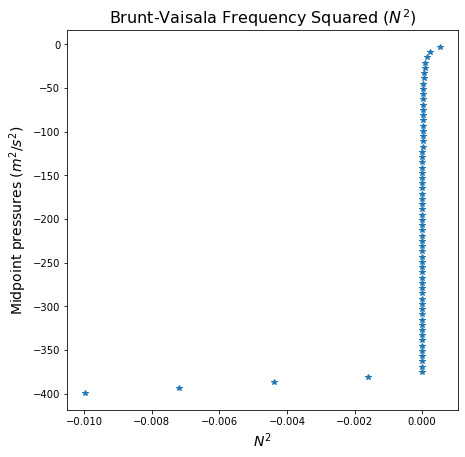

In [23]:
plt.figure(figsize = (7, 7))
plt.title('Brunt-Vaisala Frequency Squared ($N^2$)', fontsize = 16)
plt.plot( N2_uniform, -1 * Pmid_uniform[:], '*')
plt.ylabel('Midpoint pressures (${m^2}/{s^2}$)', fontsize = 14)
plt.xlabel('$N^2$', fontsize = 14)
#plt.xlim([10, 350])
#plt.ylim([0, 0.0002])
plt.savefig('sample_N2_profile.png')

In [24]:
import VERT_FSFB3

In [25]:
c2, Psi, G, N2, Pmid = VERT_FSFB3.VERT_FSFB3(N2_uniform, Pmid_uniform)

In [26]:
g = 9.81 # gravity

## With a rigid lid assumpsion, SSH = Gm/g, where g is gravity, since hydrastatic pressure p = $rho * g *  SSH$

In [27]:
SSH = G/g
SSH.shape

(68, 67)

In [28]:
Z_mid_uniform  = gsw.z_from_p(np.append(0,Pmid), lat = laty)
Z_mid_uniform.shape, N2.shape

((68,), (67,))

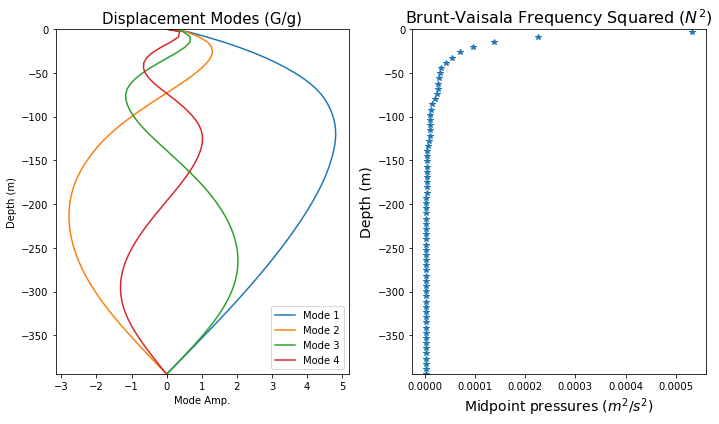

In [34]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(SSH[:,0], Z_mid_uniform, label = 'Mode 1')
plt.plot(SSH[:,1], Z_mid_uniform, label = 'Mode 2')
plt.plot(SSH[:,2], Z_mid_uniform, label = 'Mode 3')
plt.plot(SSH[:,3], Z_mid_uniform, label = 'Mode 4')
#plt.plot(SSH[:,4], Z_mid_uniform, label = 'Mode 5')
plt.xlabel('Mode Amp.')
plt.ylabel('Depth (m)')
#plt.xlim([-.2, .2])
plt.ylim([Z_mid_uniform.min(), 0])
plt.legend()
plt.title('Displacement Modes (G/g)', fontsize = 15)

plt.subplot(122)
plt.title('Brunt-Vaisala Frequency Squared ($N^2$)', fontsize = 16)
plt.plot(N2, Z_mid_uniform[1:], '*')
#plt.plot(Pmid_vector[:], N2_vector,  linewidth  = 2.0)
plt.xlabel('Midpoint pressures (${m^2}/{s^2}$)', fontsize = 14)
plt.ylabel('Depth (m)', fontsize = 14)
#plt.xlim([10, 350])
plt.ylim([Z_mid_uniform.min(), 0])

plt.tight_layout()
plt.savefig('vertical_modes_N2_sample_CCS_lon_' + str(lonx) + '_lat_' + str(laty) +'.png')

In [30]:
MODE = G.shape[-1]

In [31]:
Zgrid, mode = np.meshgrid(Z_mid_uniform, range(MODE) )

In [32]:
mode.shape, Zgrid.shape, SSH[:].shape

((67, 68), (67, 68), (68, 67))

/var/folders/4w/wvmyk9216kl39tqqrtqcndl80000gn/T/ipykernel_55029/2350866463.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(mode, Zgrid, SSH[:].T, cmap = cmo.cm.balance)
/var/folders/4w/wvmyk9216kl39tqqrtqcndl80000gn/T/ipykernel_55029/2350866463.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(mode, Zgrid,G[:].T, cmap = cmo.cm.curl)
/var/folders/4w/wvmyk9216kl39tqqrtqcndl80000gn/T/ipykernel_55029/2350866463.py:25: Matplotlib

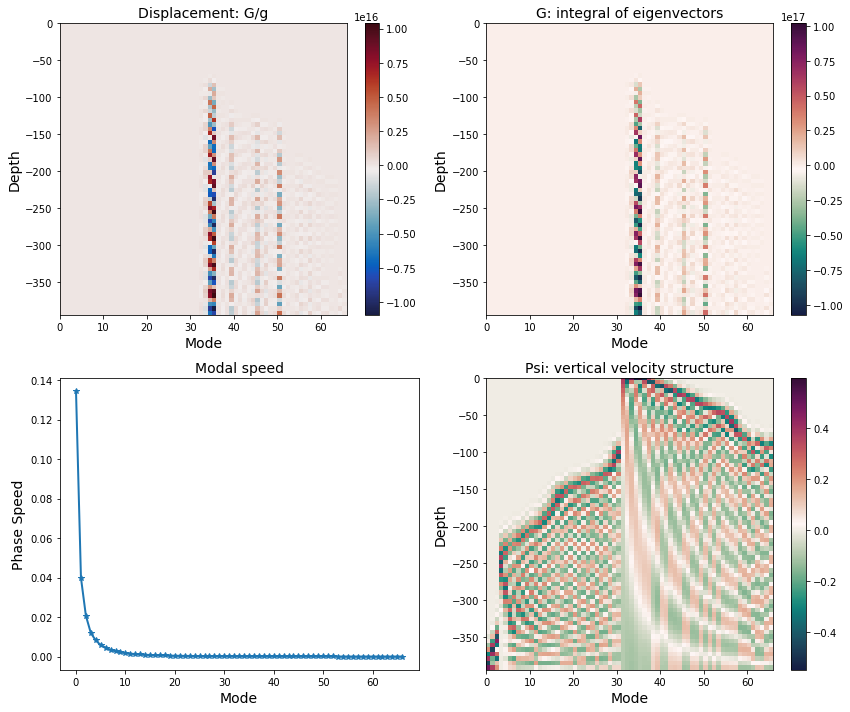

In [33]:
plt.figure(figsize = (12, 10))
plt.subplot(221)
plt.title('Displacement: G/g', fontsize = 14)
plt.pcolormesh(mode, Zgrid, SSH[:].T, cmap = cmo.cm.balance)
plt.ylabel('Depth', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
plt.colorbar()

plt.subplot(222)
plt.title('G: integral of eigenvectors', fontsize = 14)
plt.pcolor(mode, Zgrid,G[:].T, cmap = cmo.cm.curl)
plt.ylabel('Depth', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
plt.colorbar()

plt.subplot(223)
plt.title('Modal speed' , fontsize = 14)
plt.plot(c2[:], "-*", linewidth = 2)
plt.ylabel('Phase Speed', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
#plt.colorbar()

plt.subplot(224)
plt.title('Psi: vertical velocity structure' , fontsize = 14)
plt.pcolor(mode, Zgrid, Psi[:].T, cmap = cmo.cm.curl)
plt.ylabel('Depth', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
plt.colorbar()

plt.tight_layout()
plt.savefig('vertical_modes_FSFB2_N2_sample_lon_' + str(lonx) + '_lat_' + str(laty) +'.png', dpi = 100)